In [79]:
# Dependencies and Setup
import os
import csv
import codecs
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [80]:
# Specify the file path
thisFile_path = os.path.abspath("")
sch_scr_2018_path = os.path.join(thisFile_path, "GTA school score clean DF 2018.csv")
sch_scr_2019_path = os.path.join(thisFile_path, "GTA school score clean DF 2019.csv")
sch_scr_2020_path = os.path.join(thisFile_path, "GTA school score clean DF 2020.csv")
allhouse_prices_path = os.path.join(thisFile_path, "GTA house prices by region 2018-2020.csv")

In [81]:
# Read the csv files for school scores
sch_scr_2018_data = pd.read_csv(sch_scr_2018_path)
sch_scr_2019_data = pd.read_csv(sch_scr_2019_path)
sch_scr_2020_data = pd.read_csv(sch_scr_2020_path)

In [82]:
sch_scr_2018_data.head()

,Region Name,City Name,School Name,School Score
0,City of Toronto,Toronto,St Michaels Choir,9.4
1,Halton Region,Oakville,Abbey Park,9.2
2,York Region,Thornhill,St Robert,9.2
3,City of Toronto,Toronto,Ursula Franklin,9.1
4,York Region,Markham,Markville,8.9


In [83]:
score_stats_2018 = sch_scr_2018_data.groupby("Region Name").agg({"School Score": ["mean", "median", "var", "std", "sem"]})
score_stats_2019 = sch_scr_2018_data.groupby("Region Name").agg({"School Score": ["mean", "median", "var", "std", "sem"]})
score_stats_2020 = sch_scr_2018_data.groupby("Region Name").agg({"School Score": ["mean", "median", "var", "std", "sem"]})

In [54]:
score_stats_2018[("School Score", "mean")]

Region Name
City of Toronto    5.833028
Durham Region      6.324000
Halton Region      7.440000
Peel Region        6.439683
York Region        7.228947
Name: (School Score, mean), dtype: float64

In [85]:
with codecs.open(allhouse_prices_path, 'r', encoding='UTF-8', errors='ignore') as csvfile:
#with open(csvpath_sch, 'r', encoding='UTF-8') as csvfile:    
    csvreader = csv.reader(csvfile, delimiter=",") # read the file
    header = next(csvreader) # Isolate the header   
    data = [row for row in csvreader]  # Collect the data rows
    
# Convert csvreader object and header into a DataFrame
housePrice_df = pd.DataFrame.from_records(data, columns=header)
housePrice_df.head()
#house_prices_all = pd.read_csv(house_prices_all)

,﻿House,Region,Average Price 2018,Average Price 2019,Average Price 2020,Sales 2018,Sales 2019,Sales 2020
0,Detached,Halton Region,1071710.593,1280300.788,1251410.571,3819,3533,5561
1,Detached,Peel Region,920159.3917,1111765.603,1104249.554,7215,7113,9564
2,Detached,City of Toronto,1314631.176,1501783.643,1476517.773,8098,8230,9709
3,Detached,York Region,1136964.567,1309837.039,1261704.154,6471,7056,9902
4,Detached,Durham Region,654943.2333,768193.601,781918.9047,6005,6376,8497


In [86]:
housePrice_df[['Average Price 2018','Average Price 2019','Average Price 2020','Sales 2018','Sales 2019','Sales 2020']] = housePrice_df[['Average Price 2018','Average Price 2019','Average Price 2020','Sales 2018','Sales 2019','Sales 2020']].astype(float)
housePrice_df.dtypes

﻿House                 object
Region                 object
Average Price 2018    float64
Average Price 2019    float64
Average Price 2020    float64
Sales 2018            float64
Sales 2019            float64
Sales 2020            float64
dtype: object

In [39]:
price_stats_2018 = housePrice_df.groupby("Region").agg({"Average Price 2018": ["mean", "median", "var", "std", "sem"]})
price_stats_2018

Average Price 2018                                            \
                              mean       median           var            std   
Region                                                                         
City of Toronto       900175.55468  940613.7635  8.485945e+10  291306.456653   
Durham Region         493749.79356  488976.0099  1.123166e+10  105979.516889   
Halton Region         693549.48328  672521.6734  5.028461e+10  224242.301362   
Peel Region           634234.22030  627076.3965  3.482156e+10  186605.349472   
York Region           754358.95178  759825.5617  5.864191e+10  242160.912389   

                                
                           sem  
Region                          
City of Toronto  130276.207872  
Durham Region     47395.480797  
Halton Region    100284.205855  
Peel Region       83452.449277  
York Region      108297.652319

In [40]:
price_stats_2019 = housePrice_df.groupby("Region").agg({"Average Price 2019": ["mean", "median", "var", "std", "sem"]})
price_stats_2019

Average Price 2019                                             \
                              mean        median           var            std   
Region                                                                          
City of Toronto       1.072442e+06  1.134789e+06  9.976071e+10  315849.190846   
Durham Region         5.864767e+05  5.794051e+05  1.461355e+10  120886.510907   
Halton Region         8.523681e+05  8.333591e+05  6.797996e+10  260729.670270   
Peel Region           7.785875e+05  7.637079e+05  4.503861e+10  212223.010265   
York Region           8.909679e+05  9.032750e+05  7.181673e+10  267986.429293   

                                
                           sem  
Region                          
City of Toronto  141252.052274  
Durham Region     54062.091190  
Halton Region    116601.853295  
Peel Region       94909.015468  
York Region      119847.174589

In [41]:
price_stats_2020 = housePrice_df.groupby("Region").agg({"Average Price 2020": ["mean", "median", "var", "std", "sem"]})
price_stats_2020

Average Price 2020                                             \
                              mean        median           var            std   
Region                                                                          
City of Toronto       1.021979e+06  1.068163e+06  1.090658e+11  330251.174009   
Durham Region         5.868982e+05  6.012231e+05  1.827791e+10  135195.827589   
Halton Region         8.072516e+05  7.947941e+05  7.293387e+10  270062.716156   
Peel Region           7.645009e+05  7.404278e+05  4.703046e+10  216865.082330   
York Region           8.516133e+05  8.600890e+05  6.781162e+10  260406.647057   

                                
                           sem  
Region                          
City of Toronto  147692.814947  
Durham Region     60461.412153  
Halton Region    120775.718302  
Peel Region       96985.013207  
York Region      116457.392923

In [89]:
sales_stats_2018 = housePrice_df.groupby("Region").agg({"Sales 2018": ["mean", "median", "var", "std", "sem"]})
sales_stats_2019 = housePrice_df.groupby("Region").agg({"Sales 2019": ["mean", "median", "var", "std", "sem"]})
sales_stats_2020 = housePrice_df.groupby("Region").agg({"Sales 2020": ["mean", "median", "var", "std", "sem"]})

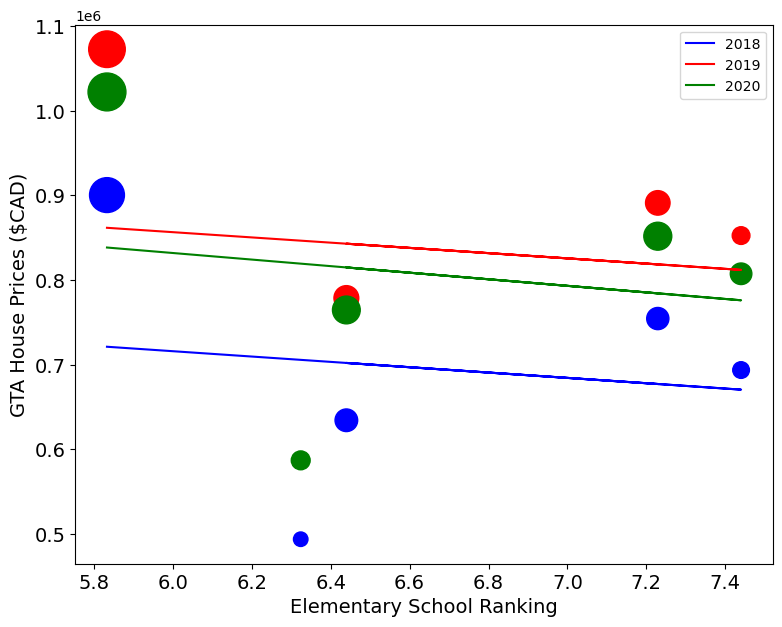

In [106]:
F = 50000000 # common factor
# indexs
#index_18 = [(P*S*SL)/F for P, S,SL in zip(score_stats_2018[("School Score", "mean")], price_stats_2018[("Average Price 2018", "mean")], sales_stats_2018[("Sales 2018","mean")])]
#index_19 = [(P*S*SL)/F for P, S,SL in zip(score_stats_2019[("School Score", "mean")], price_stats_2019[("Average Price 2019", "mean")], sales_stats_2019[("Sales 2019","mean")])]
#index_20 = [(P*S*SL)/F for P, S,SL in zip(score_stats_2020[("School Score", "mean")], price_stats_2020[("Average Price 2020", "mean")], sales_stats_2020[("Sales 2020","mean")])]
index_18 = [(P*S*SL)/F for P, S,SL in zip(score_stats_2018[("School Score", "mean")], price_stats_2018[("Average Price 2018", "mean")], sales_stats_2018[("Sales 2018","mean")])]
index_19 = [(P*S*SL)/F for P, S,SL in zip(score_stats_2019[("School Score", "mean")], price_stats_2019[("Average Price 2019", "mean")], sales_stats_2019[("Sales 2019","mean")])]
index_20 = [(P*S*SL)/F for P, S,SL in zip(score_stats_2020[("School Score", "mean")], price_stats_2020[("Average Price 2020", "mean")], sales_stats_2020[("Sales 2020","mean")])]




# Scatter plots
plt.figure(figsize=(9,7))
plt.scatter(score_stats_2018[("School Score", "mean")], price_stats_2018[("Average Price 2018", "mean")], s = index_18,color="blue",)
plt.scatter(score_stats_2019[("School Score", "mean")], price_stats_2019[("Average Price 2019", "mean")], s = index_19,color="red",)
plt.scatter(score_stats_2020[("School Score", "mean")], price_stats_2020[("Average Price 2020", "mean")], s = index_20,color="green",)

# 2018
(slope_18, intercept_18, rvalue_18, pvalue_18, stderr_18) = linregress(score_stats_2018[("School Score", "mean")], price_stats_2018[("Average Price 2018", "mean")])
regress_values_18 = score_stats_2018[("School Score", "mean")] * slope_18 + intercept_18
plt.plot(score_stats_2018[("School Score", "mean")],regress_values_18, "b-", label="2018")
#plt.text(0.5, 9, f'R = {rvalue_18:.2f}', fontsize=12)

# 2019
(slope_19, intercept_19, rvalue_19, pvalue_19, stderr_19) = linregress(score_stats_2019[("School Score", "mean")], price_stats_2019[("Average Price 2019", "mean")])
regress_values_19 = score_stats_2019[("School Score", "mean")] * slope_19 + intercept_19
plt.plot(score_stats_2019[("School Score", "mean")],regress_values_19, "r-", label="2019")

# 2020
(slope_20, intercept_20, rvalue_20, pvalue_20, stderr_20) = linregress(score_stats_2020[("School Score", "mean")], price_stats_2020[("Average Price 2020", "mean")])
regress_values_20 = score_stats_2020[("School Score", "mean")] * slope_20 + intercept_20
plt.plot(score_stats_2020[("School Score", "mean")],regress_values_20, "g-", label="2020")

plt.xlabel('Elementary School Ranking', fontsize = 14)
plt.ylabel('GTA House Prices ($CAD)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper right")
plt.show()

In [71]:
index_18

[5250748.785922422,
 3122473.69447344,
 5160008.1556032,
 4084267.0345350793,
 5453221.159314895]

In [72]:
index_19

[6255581.402089577,
 3708878.4827080797,
 6341618.8867536,
 5013856.24822508,
 6440759.862027685]

In [73]:
index_20

[5961231.918114202,
 3711544.2835814394,
 6005951.7679968,
 4923142.801076191,
 6156267.807947737]

In [107]:
rvalue_18

-0.14021302356399754

In [108]:
rvalue_19

-0.11679770652812209

In [109]:
rvalue_20

-0.1647249800492176